# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy

In [42]:
env = gym.make('CartPole-v1')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4*np.random.rand(s_size, a_size)  # weights for simple linear policy: state_space x action_space
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state, stochastic):
        probs = self.forward(state)
        if stochastic:
            action = np.random.choice(2, p=probs) # option 1: stochastic policy
        else:
            action = np.argmax(probs)              # option 2: deterministic policy
        return action

observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space: Discrete(2)


### 3. Train the Agent with Stochastic Policy Search

In [43]:
env = gym.make('CartPole-v1')
env.reset(seed=0)
np.random.seed(0)

policy = Policy()

def hill_climbing(n_episodes=3000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state, _ = env.reset()
        for t in range(max_t):
            action = policy.act(state, True)
            state, reward, done, info, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_w
            break
        
    return scores
            
scores = hill_climbing()

Episode 100	Average Score: 63.14
Episode 200	Average Score: 78.90
Episode 300	Average Score: 110.49
Episode 400	Average Score: 102.54
Episode 500	Average Score: 143.56
Episode 600	Average Score: 144.76
Episode 700	Average Score: 146.59
Episode 800	Average Score: 147.70
Episode 900	Average Score: 158.17
Episode 1000	Average Score: 149.13
Episode 1100	Average Score: 141.03
Episode 1200	Average Score: 136.74
Episode 1300	Average Score: 164.98
Episode 1400	Average Score: 145.76
Episode 1500	Average Score: 144.69
Episode 1600	Average Score: 150.96
Episode 1700	Average Score: 146.85
Episode 1800	Average Score: 158.78
Episode 1900	Average Score: 149.72
Episode 2000	Average Score: 157.40
Episode 2100	Average Score: 144.23
Episode 2200	Average Score: 152.46
Episode 2300	Average Score: 151.73
Episode 2400	Average Score: 138.02
Episode 2500	Average Score: 151.55
Episode 2600	Average Score: 157.06
Episode 2700	Average Score: 139.96
Episode 2800	Average Score: 143.09
Episode 2900	Average Score: 155

### 4. Plot the Scores

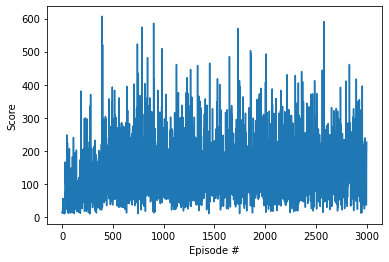

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [51]:
env = gym.make('CartPole-v1', render_mode="human")
state, _ = env.reset()
for t in range(10000):
    action = policy.act(state, False)
    env.render()
    state, reward, done, info, _ = env.step(action)
    if done:
        print(t)
        break 

env.close()

293
